<a href="https://colab.research.google.com/github/lauramoraes/Analise_de_Clusters/blob/master/6%20-%20KMeans%20(anima%C3%A7%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc, cm



In [0]:
NPOINTS = 200
NCLUSTERS = 5

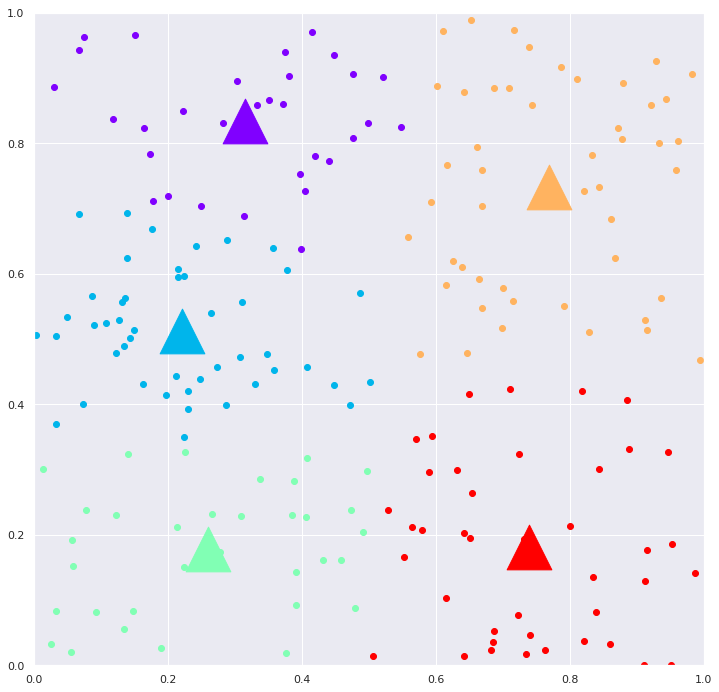

In [8]:
data = np.random.rand(NPOINTS, 2)
rc('animation', html='html5')


fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ln, = plt.plot([], [], 'ro')

def init():
    sns.set(style="darkgrid")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    return ln,

def update(frame):

  ln = plot_kmeans(frame[0], frame[1])
  return ln,
    

def plot_kmeans(kmeans, data):
  global ax
  ax.clear()
  # C0
  color=iter(cm.rainbow(np.linspace(0, 1, NCLUSTERS)))
  for cluster in range(NCLUSTERS):
    c = next(color)
    idx = np.where(kmeans.labels_ == cluster)[0]
    ax.scatter(data[idx].T[0], data[idx].T[1], color=c)
    ax.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                color=c, s=2000, marker='^')

  return ln


def create_frames(data):
    #First frame
    frames = []
    initial_centroids = np.random.rand(NCLUSTERS, 2)
    kmeans = KMeans(n_clusters=NCLUSTERS, init=initial_centroids,
                    max_iter=1, n_init=1,
                    algorithm='full',
                    precompute_distances=False,
                    verbose=0)
    kmeans.fit(data)
    frames.append((
        kmeans,
        data
    ))
    for _ in range(100):
        kmeans = KMeans(n_clusters=NCLUSTERS, 
                        init=kmeans.cluster_centers_,
                        max_iter=1,
                        n_init=1,
                        algorithm='full',
                        precompute_distances=False,
                        verbose=0)
        kmeans.fit(data)
        frames.append((
            kmeans,
            data
        ))
    return frames
  
ani = FuncAnimation(fig, update, frames=create_frames(data),
                    init_func=init, interval=1000);

ani